In [15]:
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.figsize": (12,8), "figure.dpi" : 300})
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.patches as mpatches

In [3]:
df = pd.read_csv("penguins_size.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [10]:
df[(df["sex"] == np.nan)].index.tolist()

[]

In [11]:
df['sex'] = df['sex'].replace('.', "FEMALE")

<AxesSubplot:title={'center':'Sex distribution'}, ylabel='sex'>

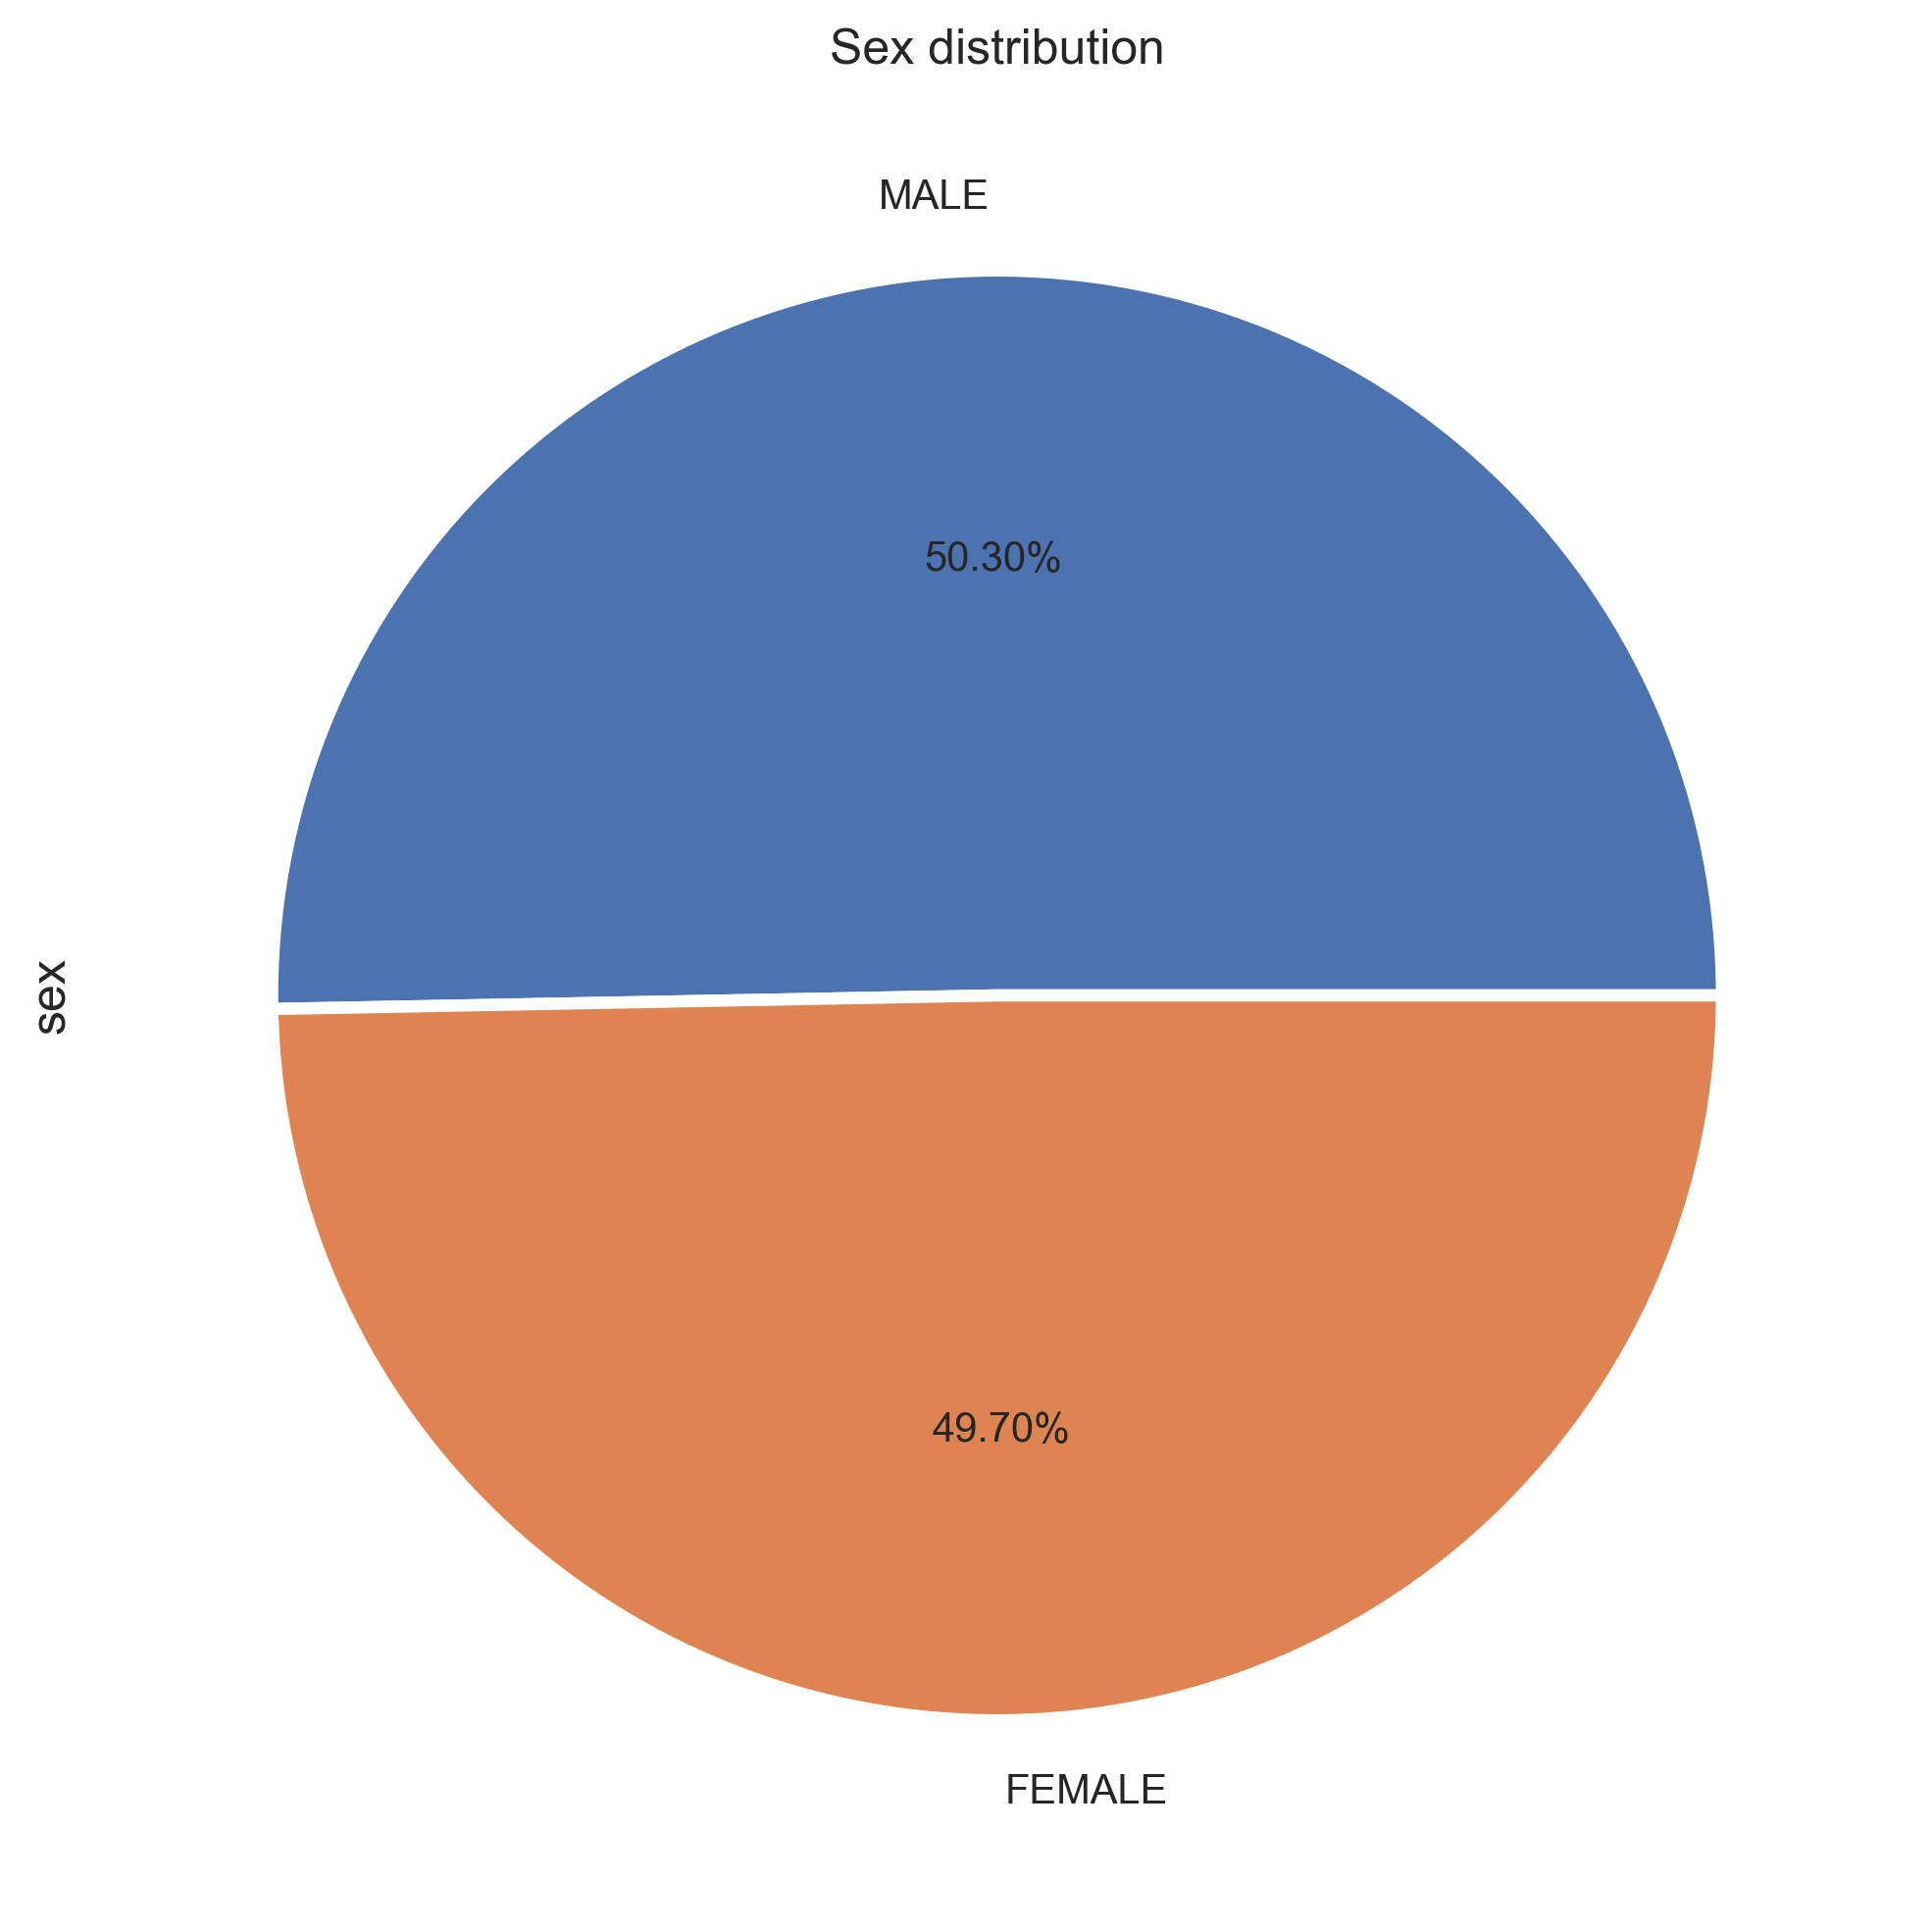

In [12]:
Sex = df.sex.value_counts()
Sex.plot(kind = 'pie', autopct="%.2f%%", wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, title = "Sex distribution", fontsize = 10)


In [13]:
male = df[df['sex'] == "MALE"]
female = df[df['sex'] == "FEMALE"]

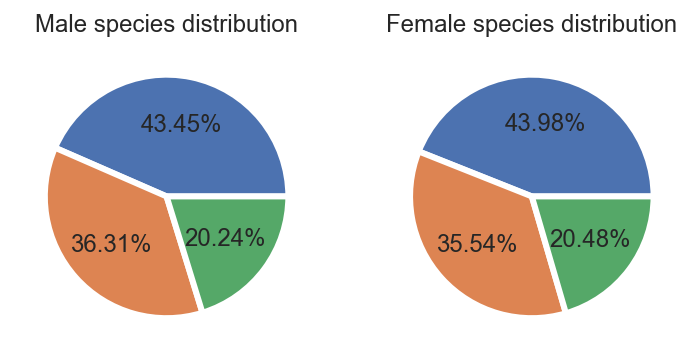

In [20]:
fig = plt.figure(figsize=(6,5),dpi=144)
ax1 = fig.add_subplot(121)

Species_male = male.species.value_counts()
ax1.pie(Species_male, autopct="%.2f%%", wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
title = plt.title("Male species distribution")

ax2 = fig.add_subplot(122)
Species_female = female.species.value_counts()
ax2.pie(Species_female, autopct="%.2f%%", wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
title = plt.title("Female species distribution")

plt.show()

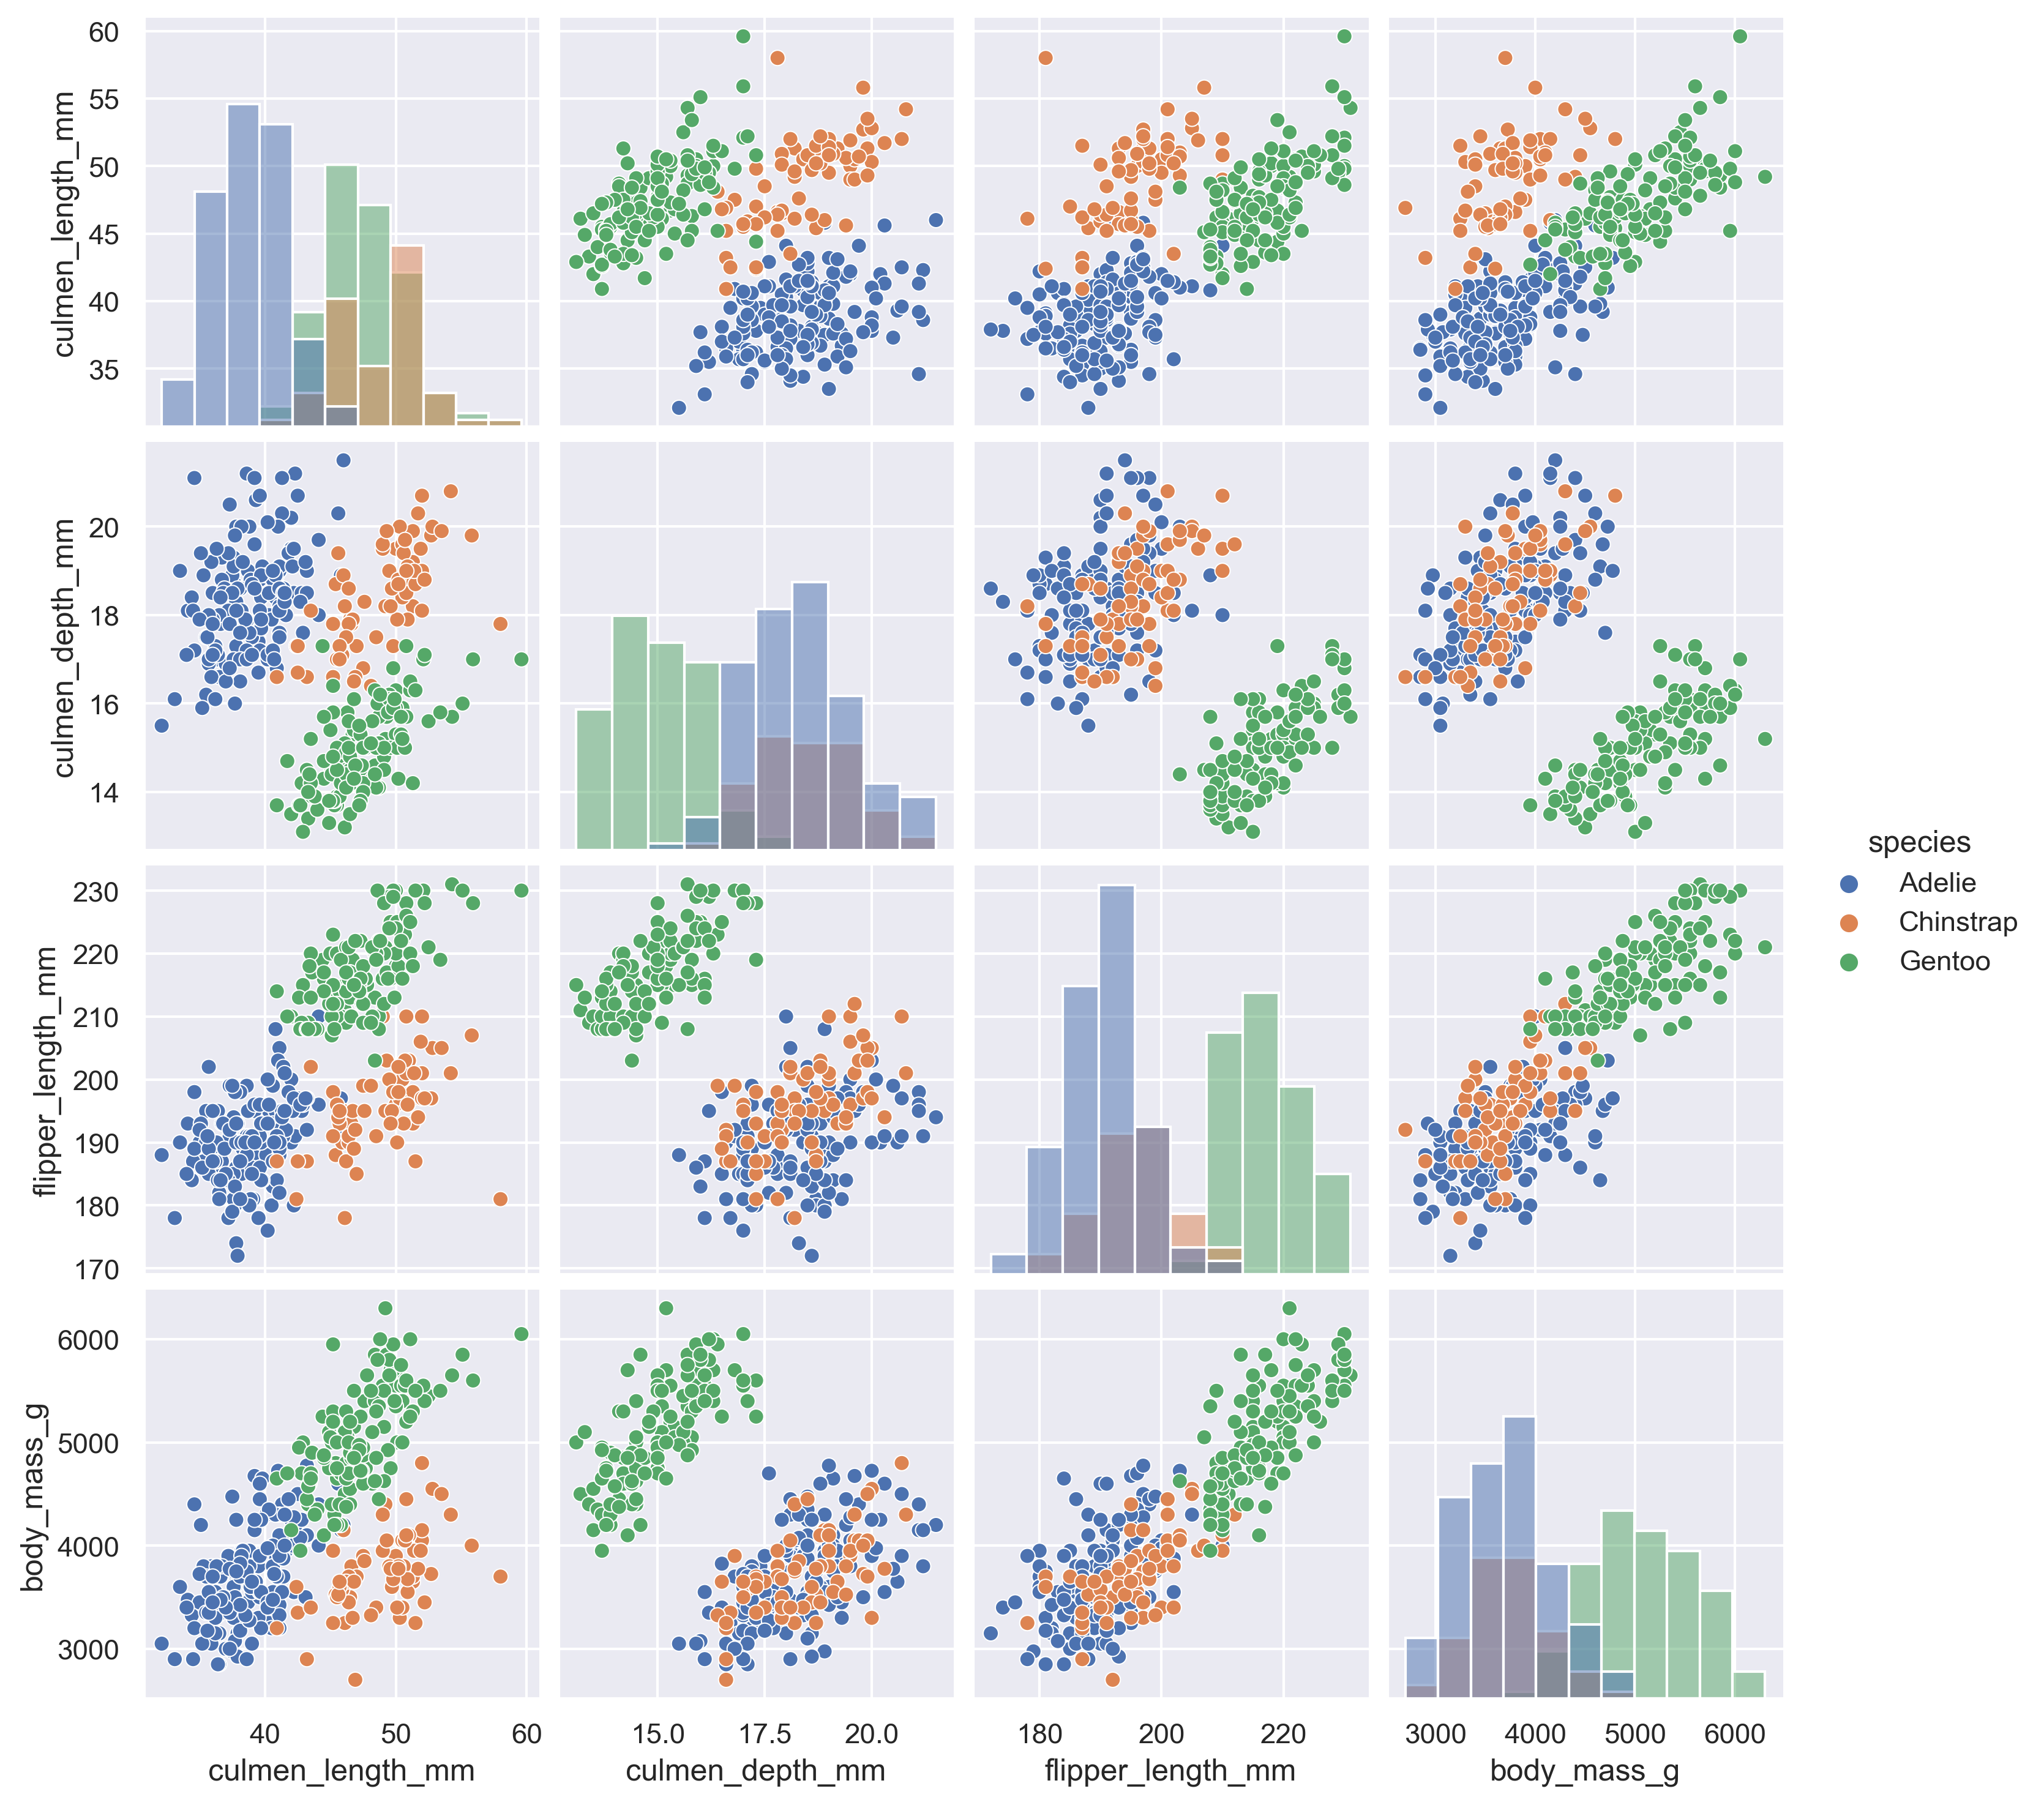

In [ ]:
sns.pairplot(data = df, hue = "species", diag_kind = "hist")

Text(0.5, 1.0, 'Flipper length')

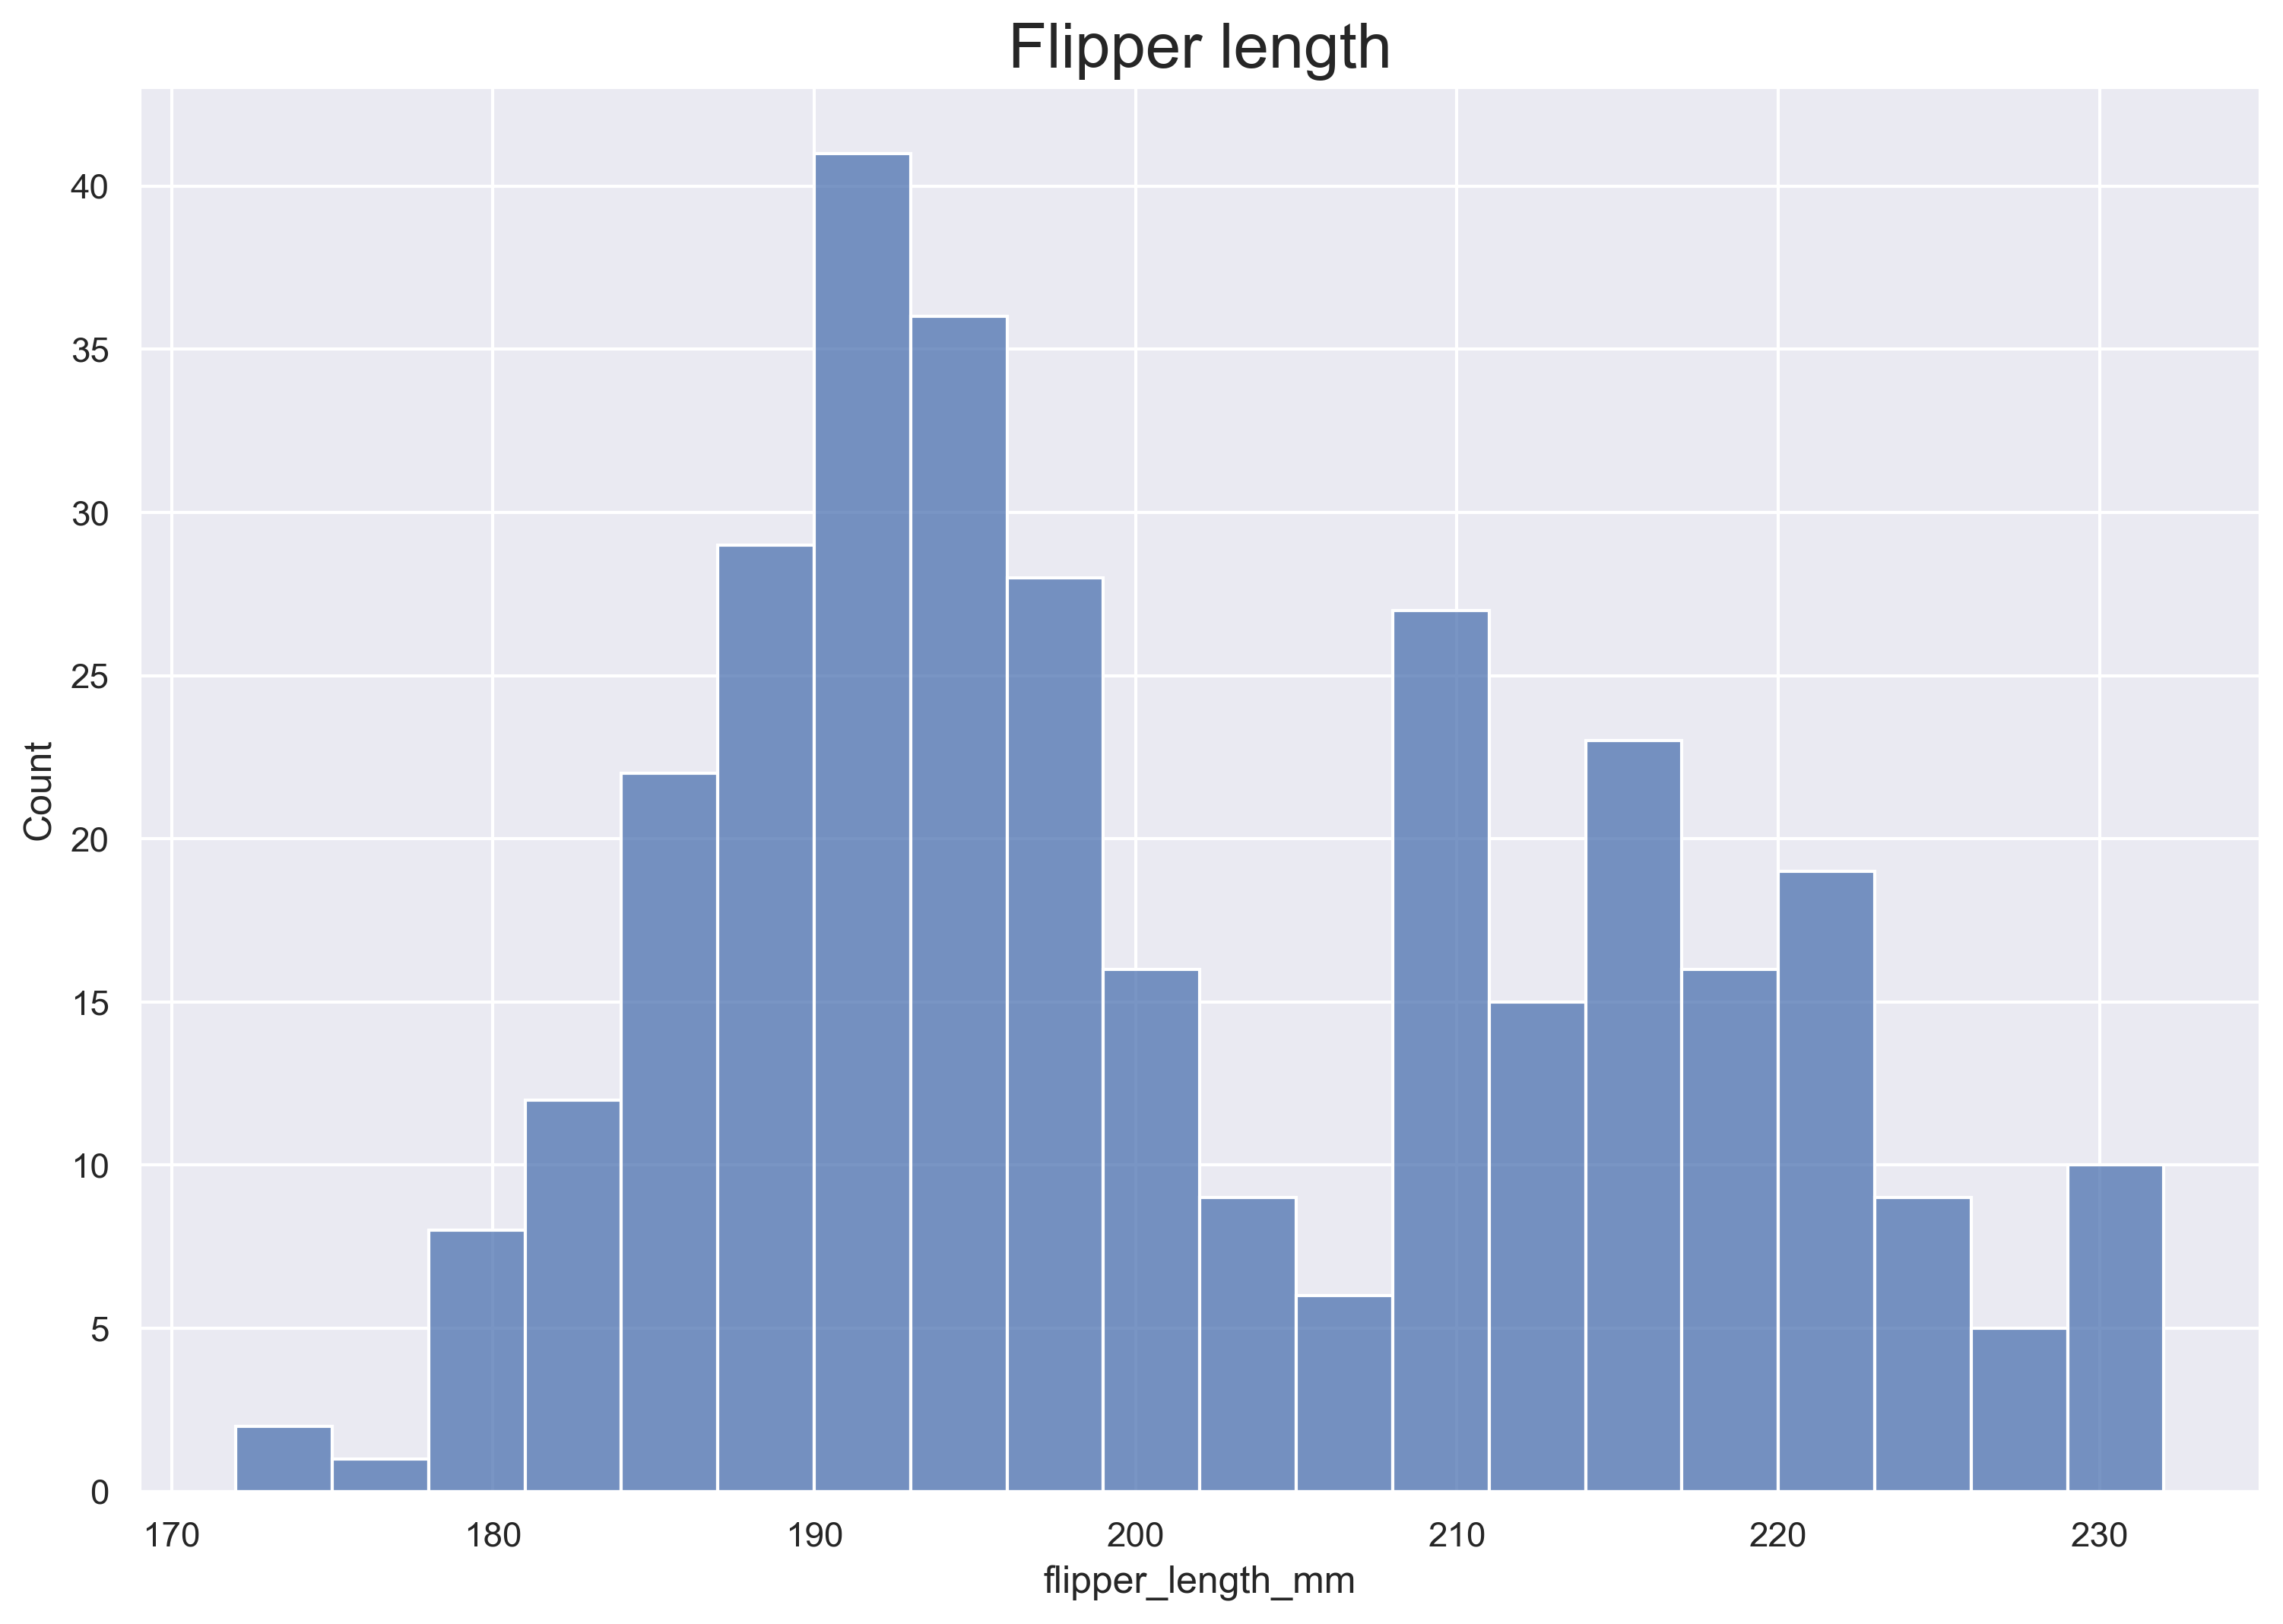

In [ ]:
sns.histplot(x = "flipper_length_mm", data = df, binwidth=3)
plt.title("Flipper length", size = 20)

Text(0.5, 1.0, 'Flipper Length by species')

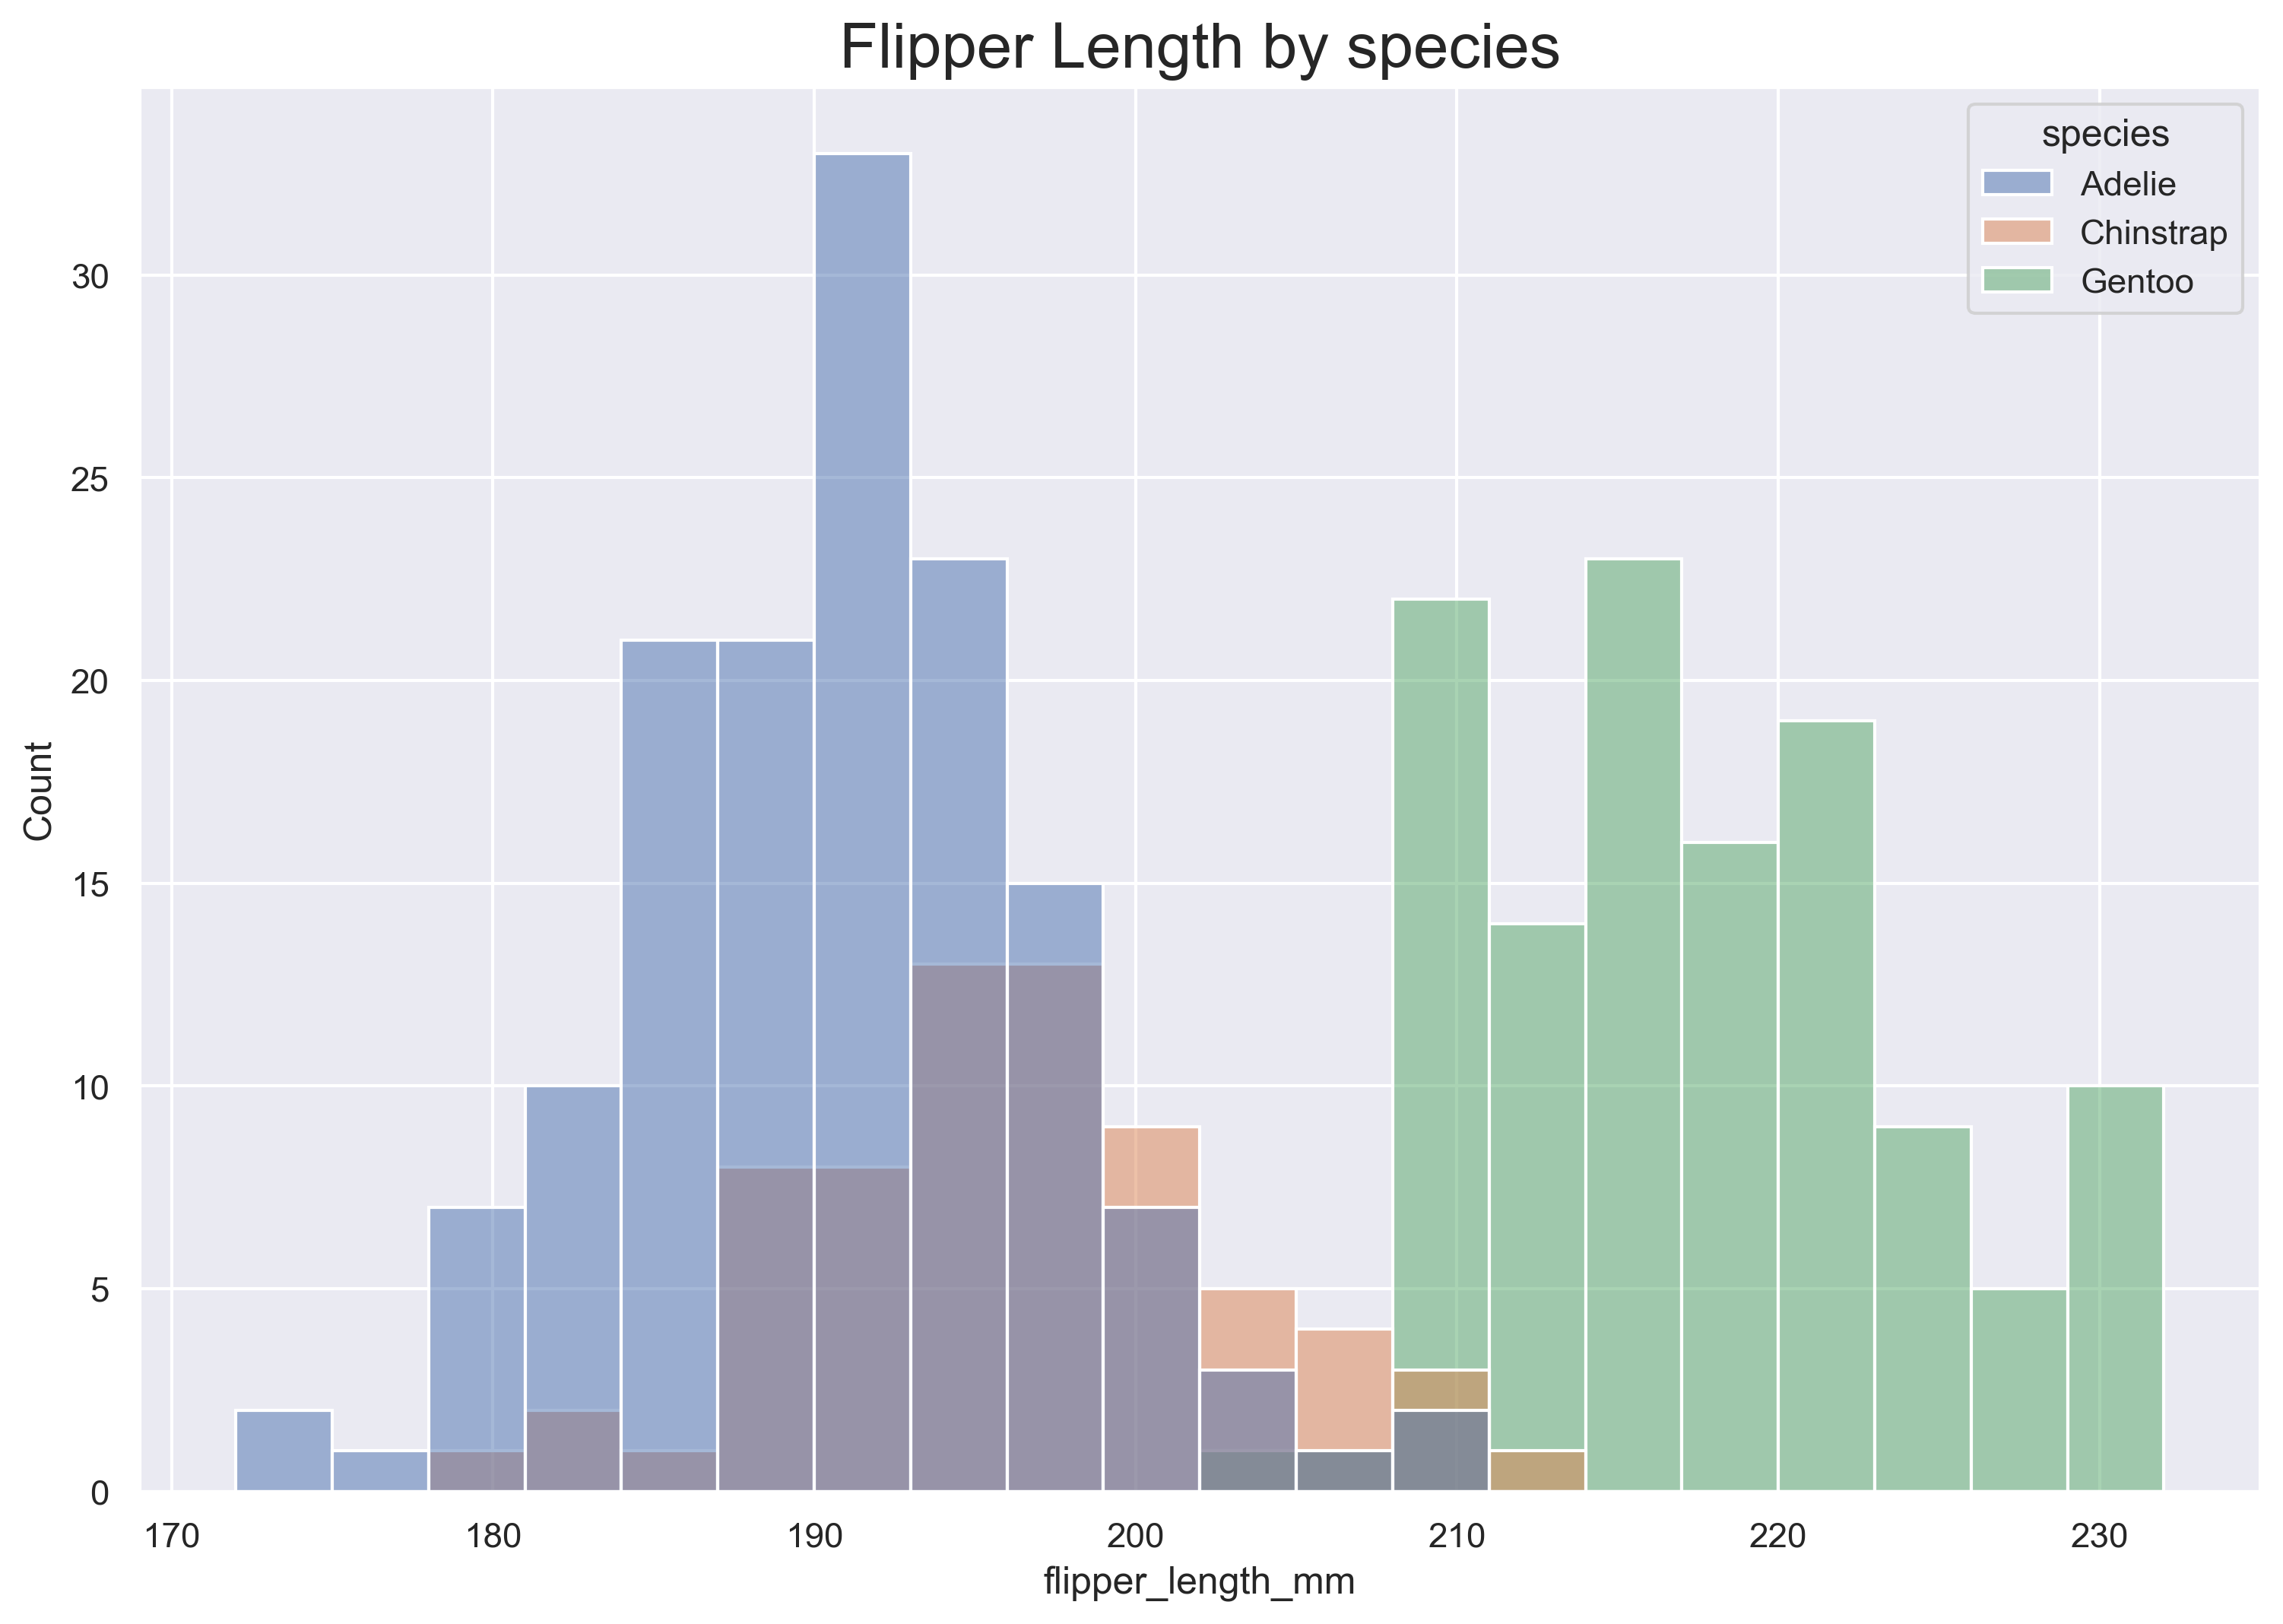

In [ ]:
sns.histplot(x = 'flipper_length_mm', data = df, hue = "species", binwidth = 3)
plt.title("Flipper Length by species", size=20)


Text(0.5, 1.0, 'Flipper Length by island')

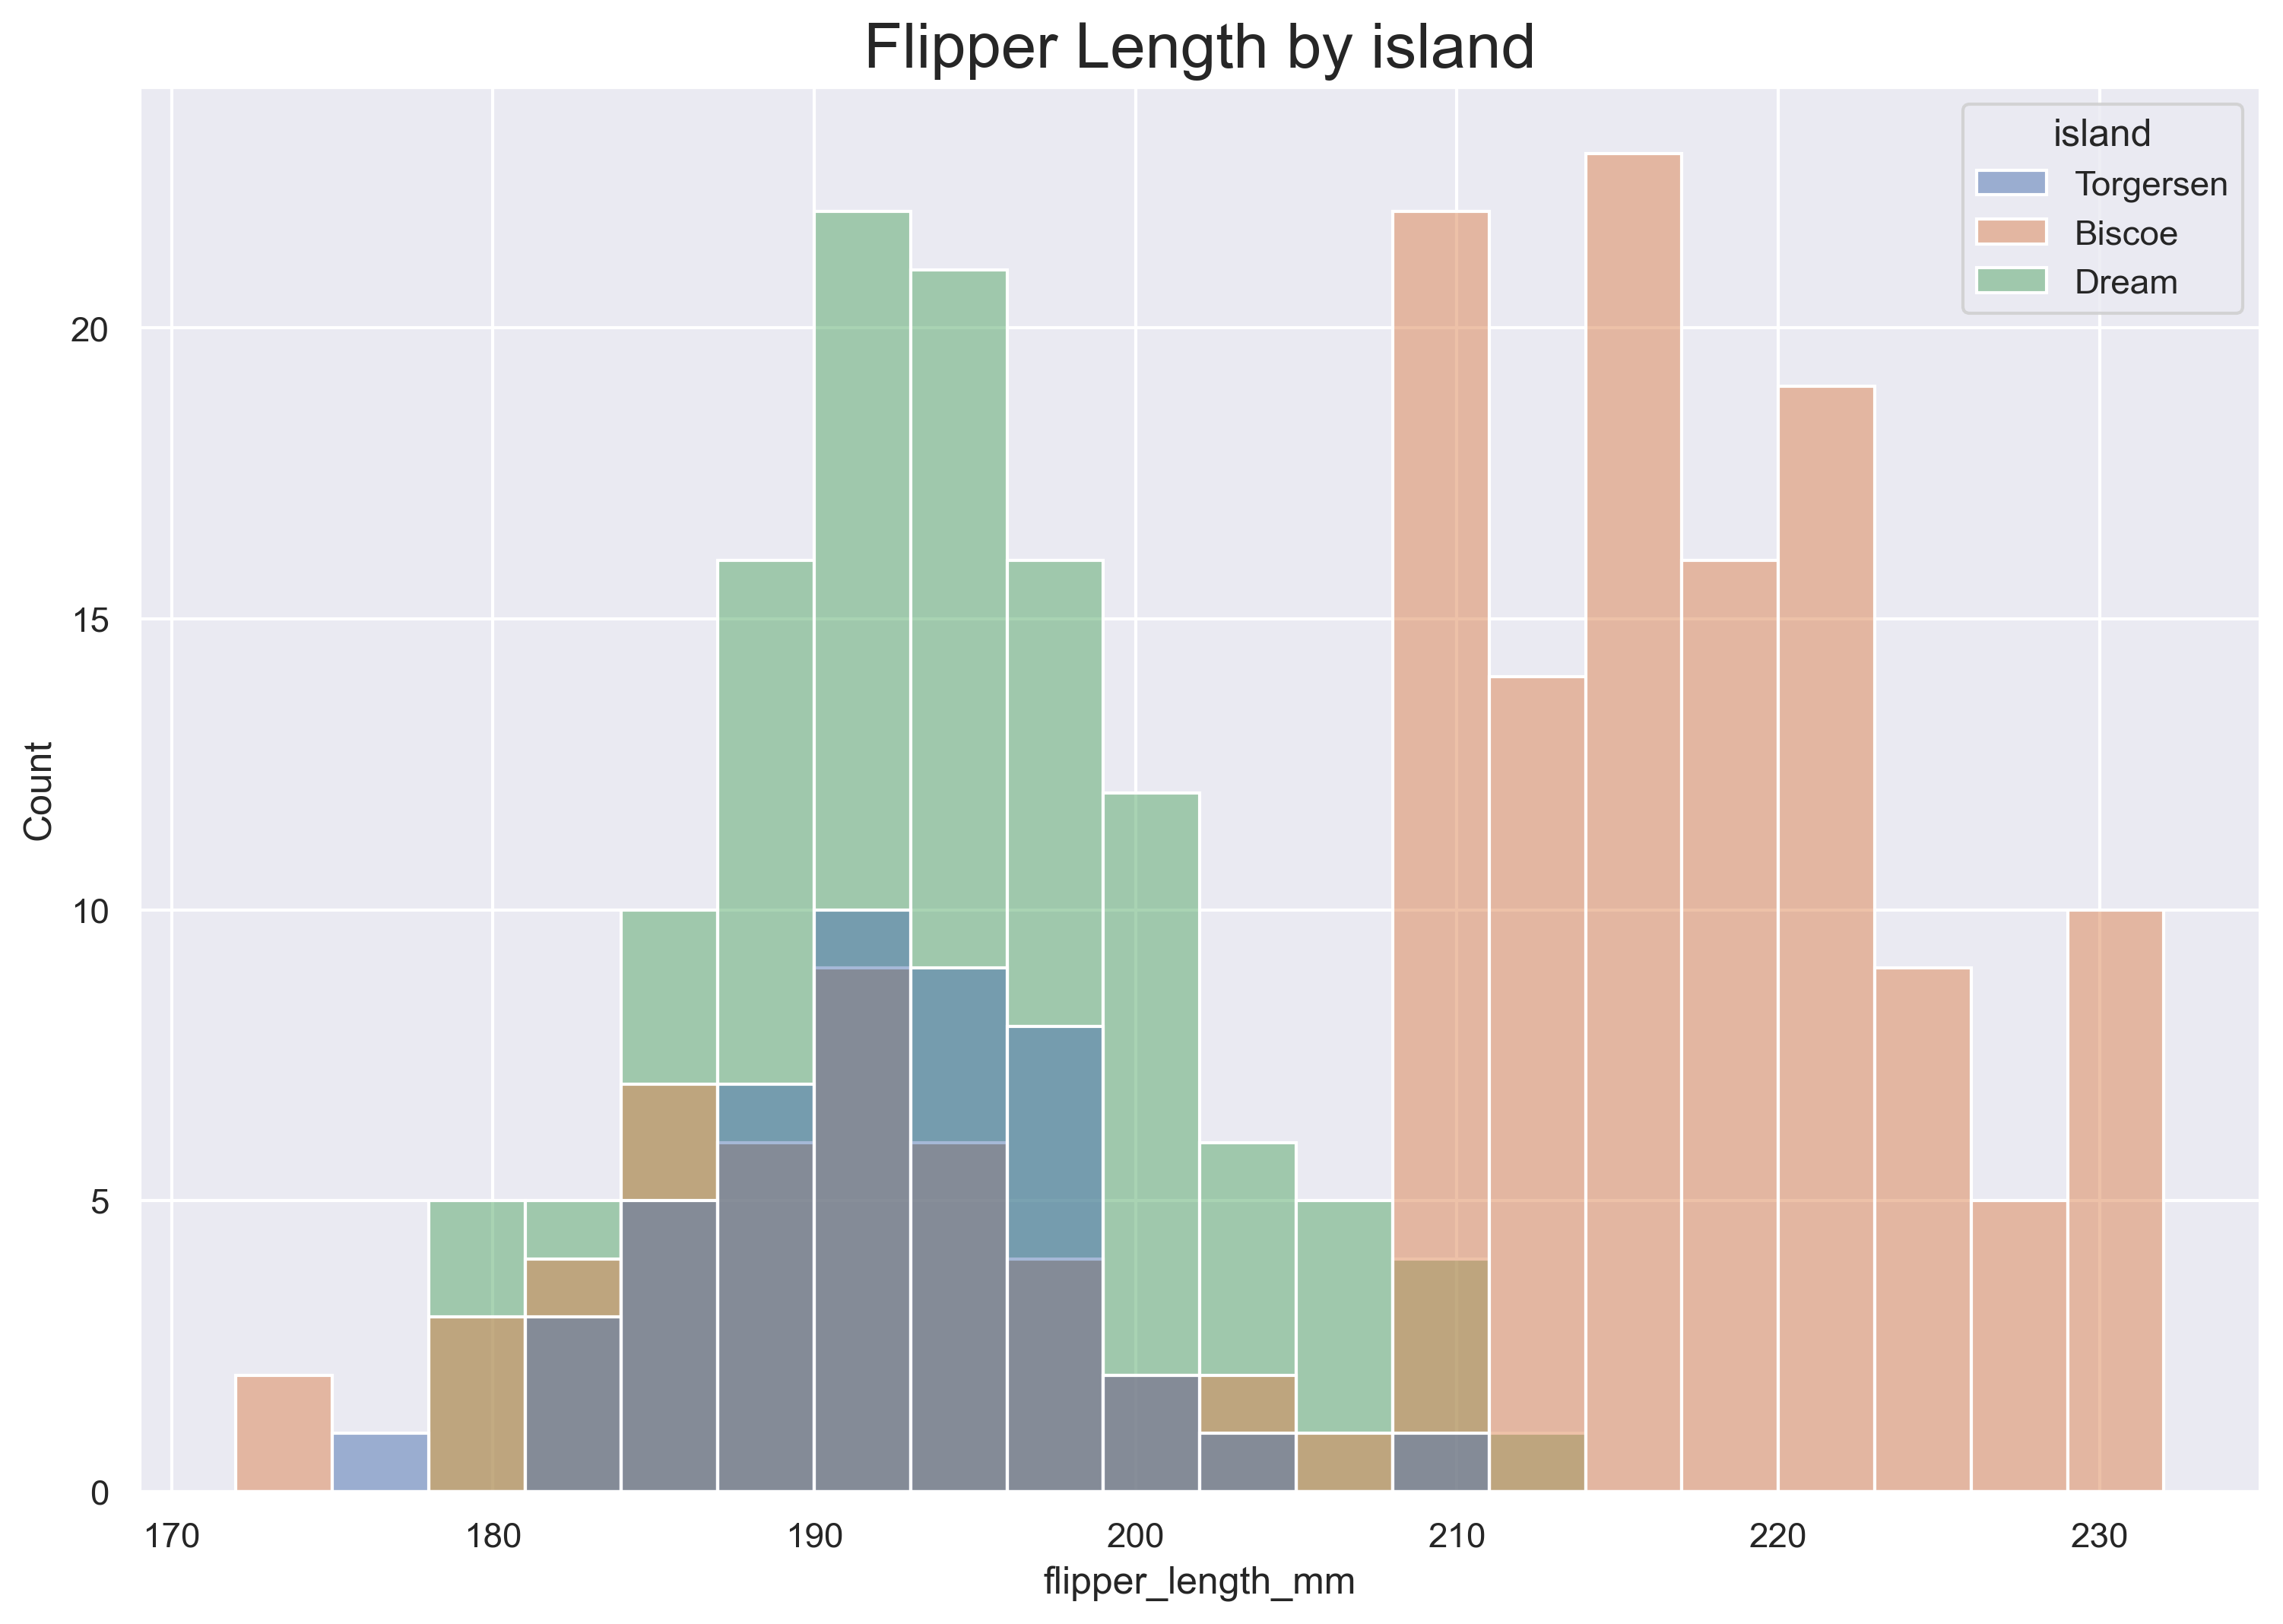

In [ ]:
sns.histplot(x = 'flipper_length_mm', data = df, hue = "island", binwidth = 3)
plt.title("Flipper Length by island", size=20)


Text(0.5, 1.0, 'Flipper Length by sex')

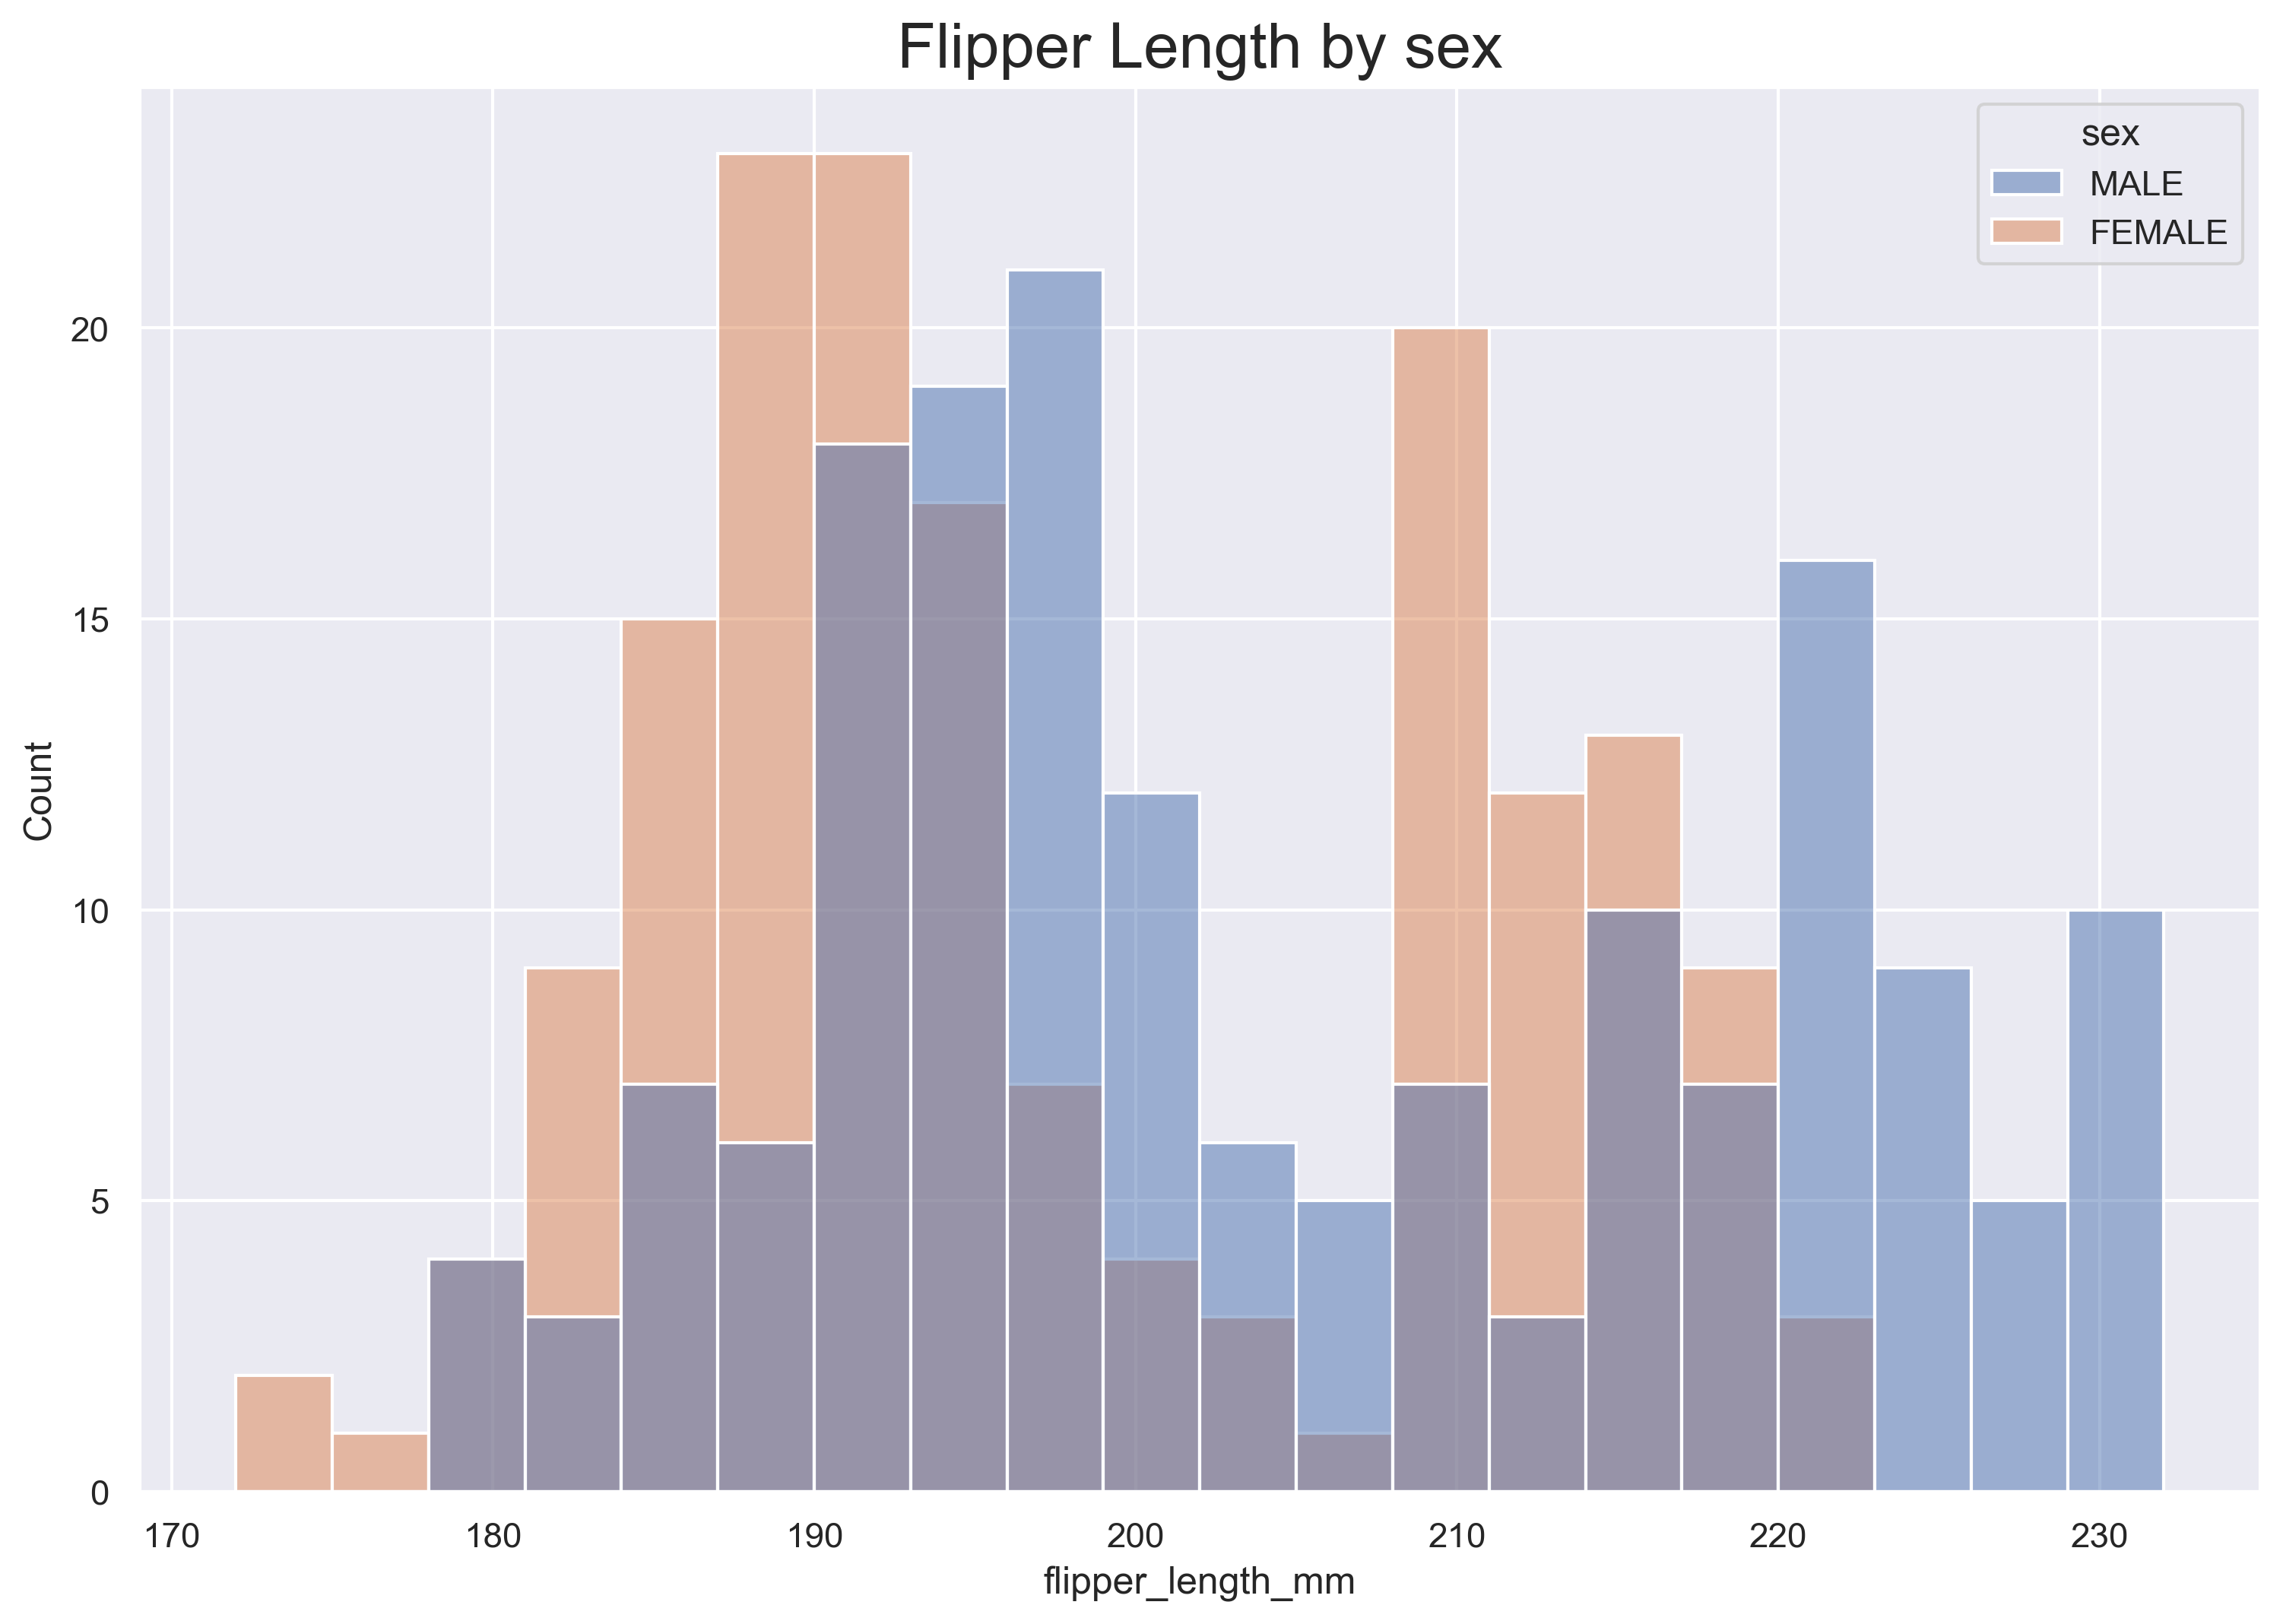

In [ ]:
sns.histplot(x = 'flipper_length_mm', data = df, hue = "sex", binwidth=3)
plt.title("Flipper Length by sex", size=20)


Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

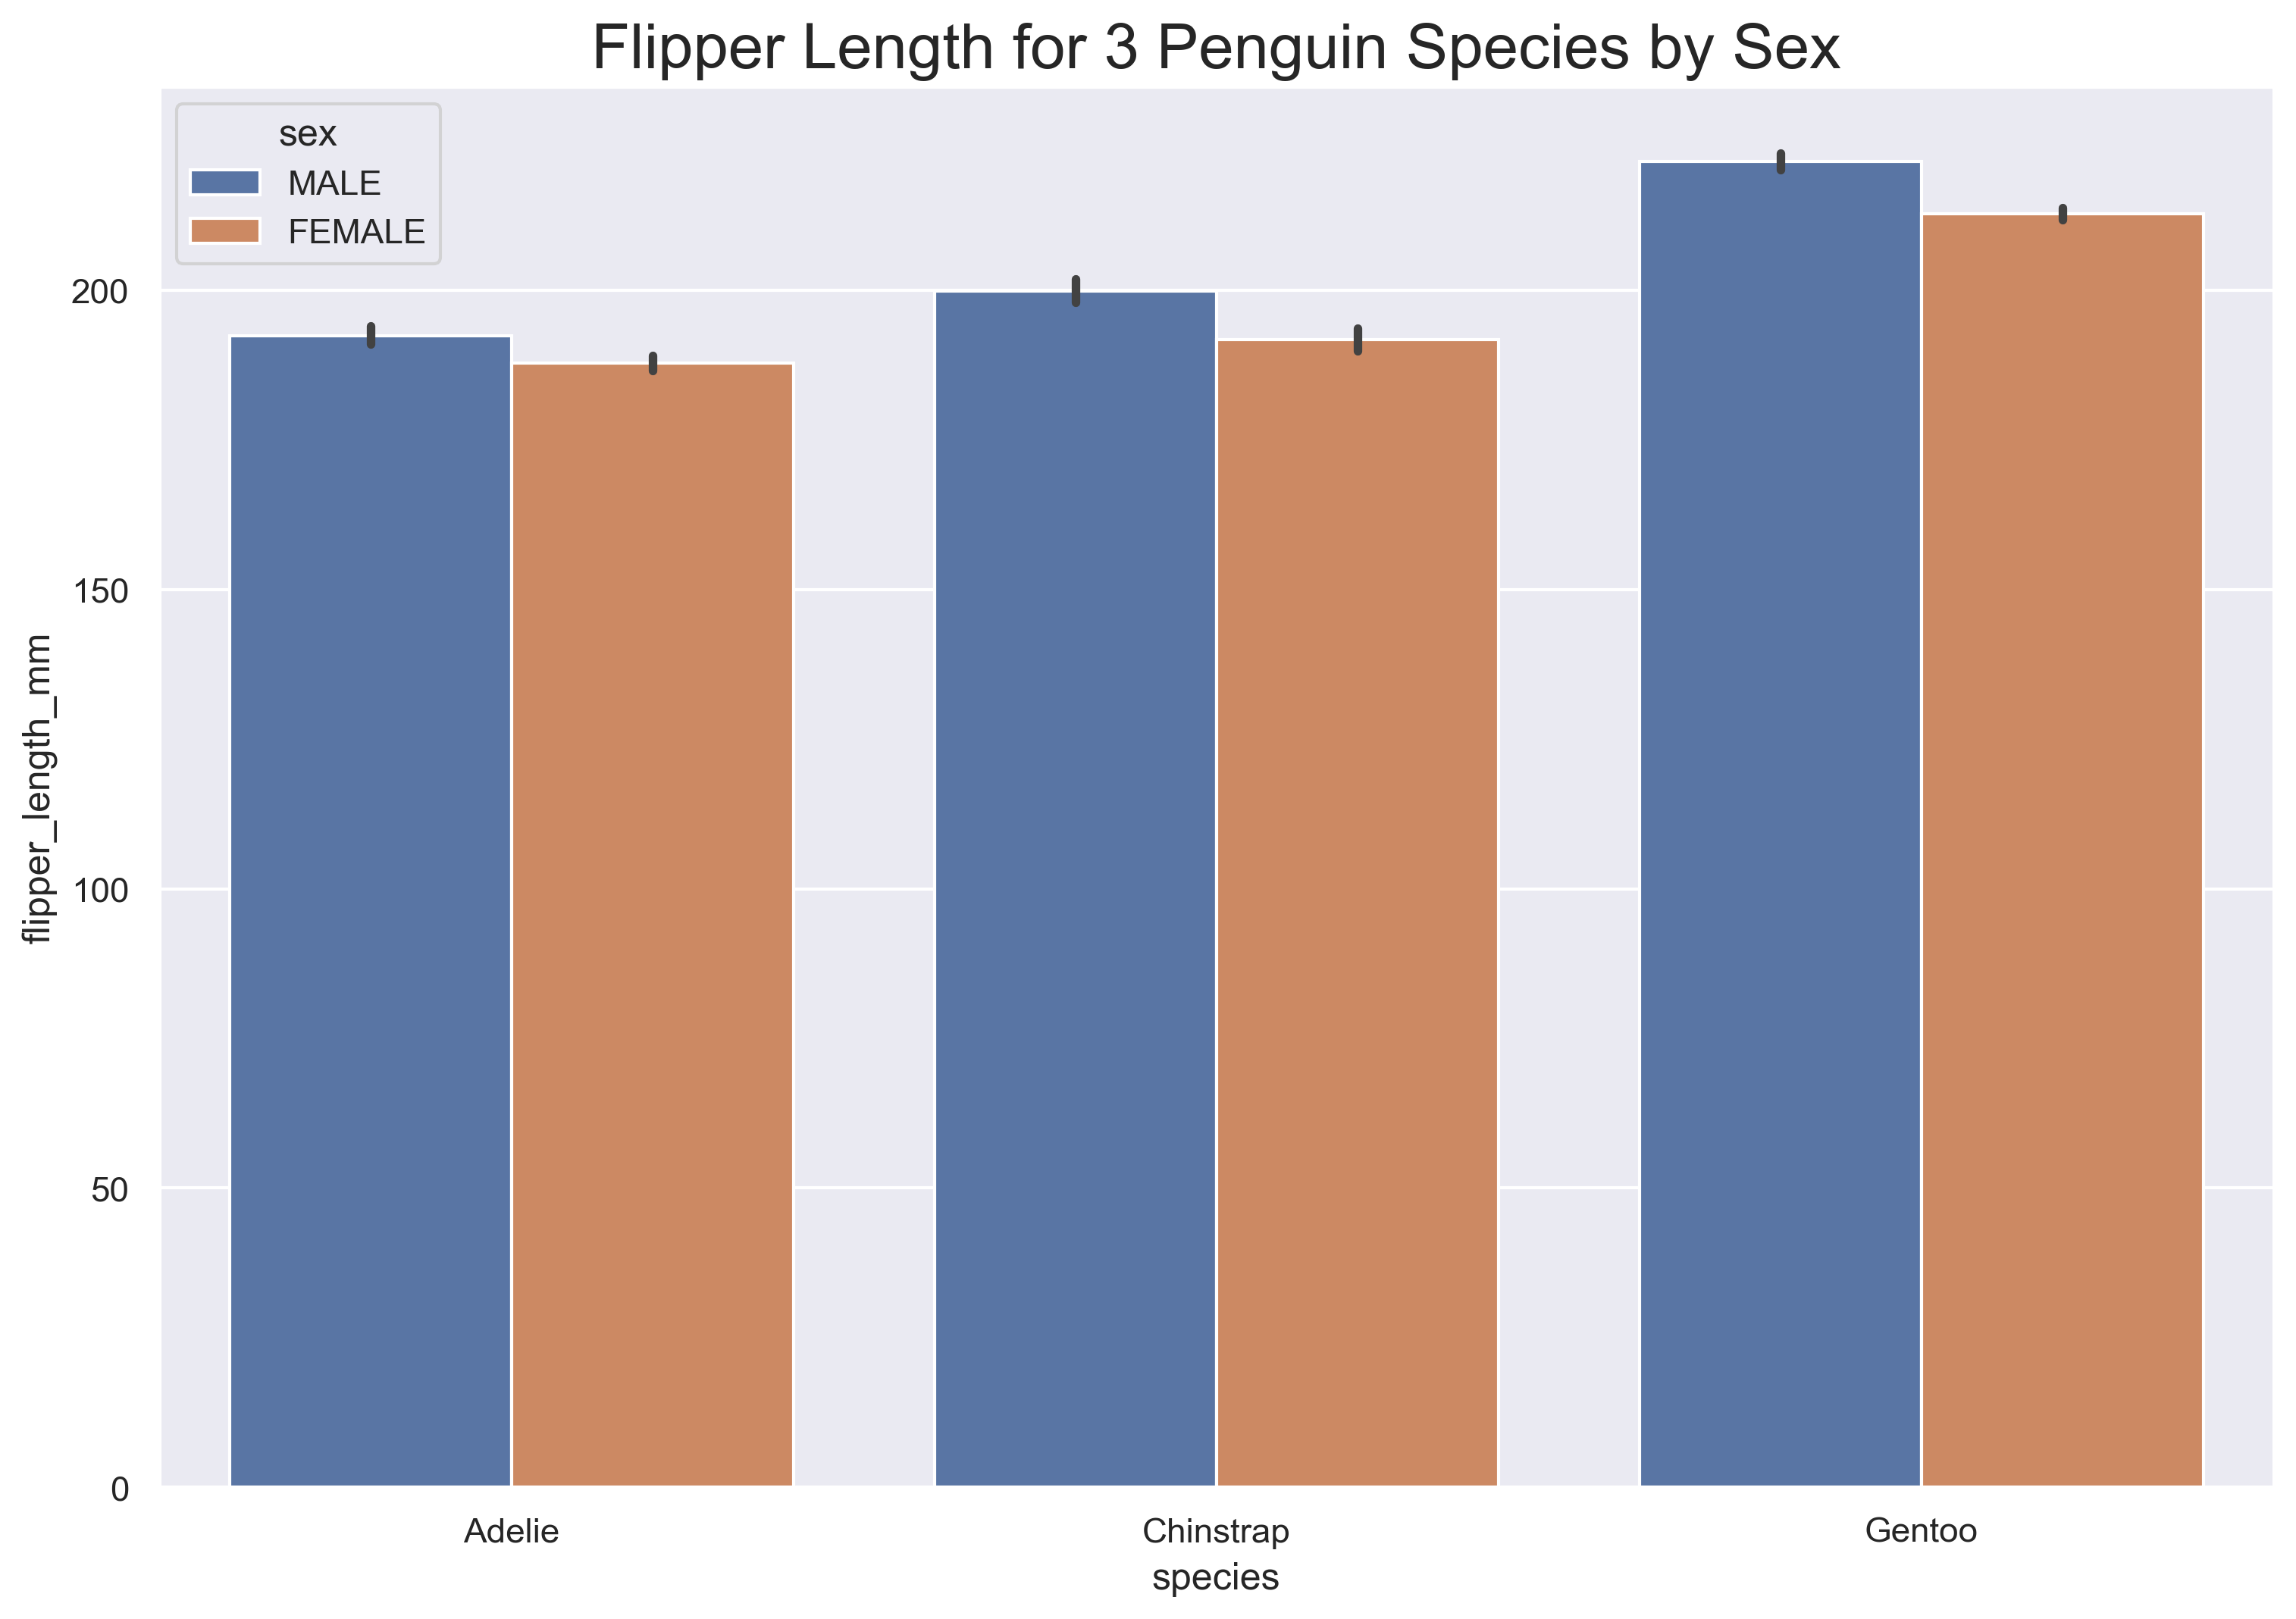

In [ ]:
sns.barplot(x = 'species', y = 'flipper_length_mm', data = df, hue = 'sex')
plt.title("Flipper Length for 3 Penguin Species by Sex", size =20)

<AxesSubplot:>

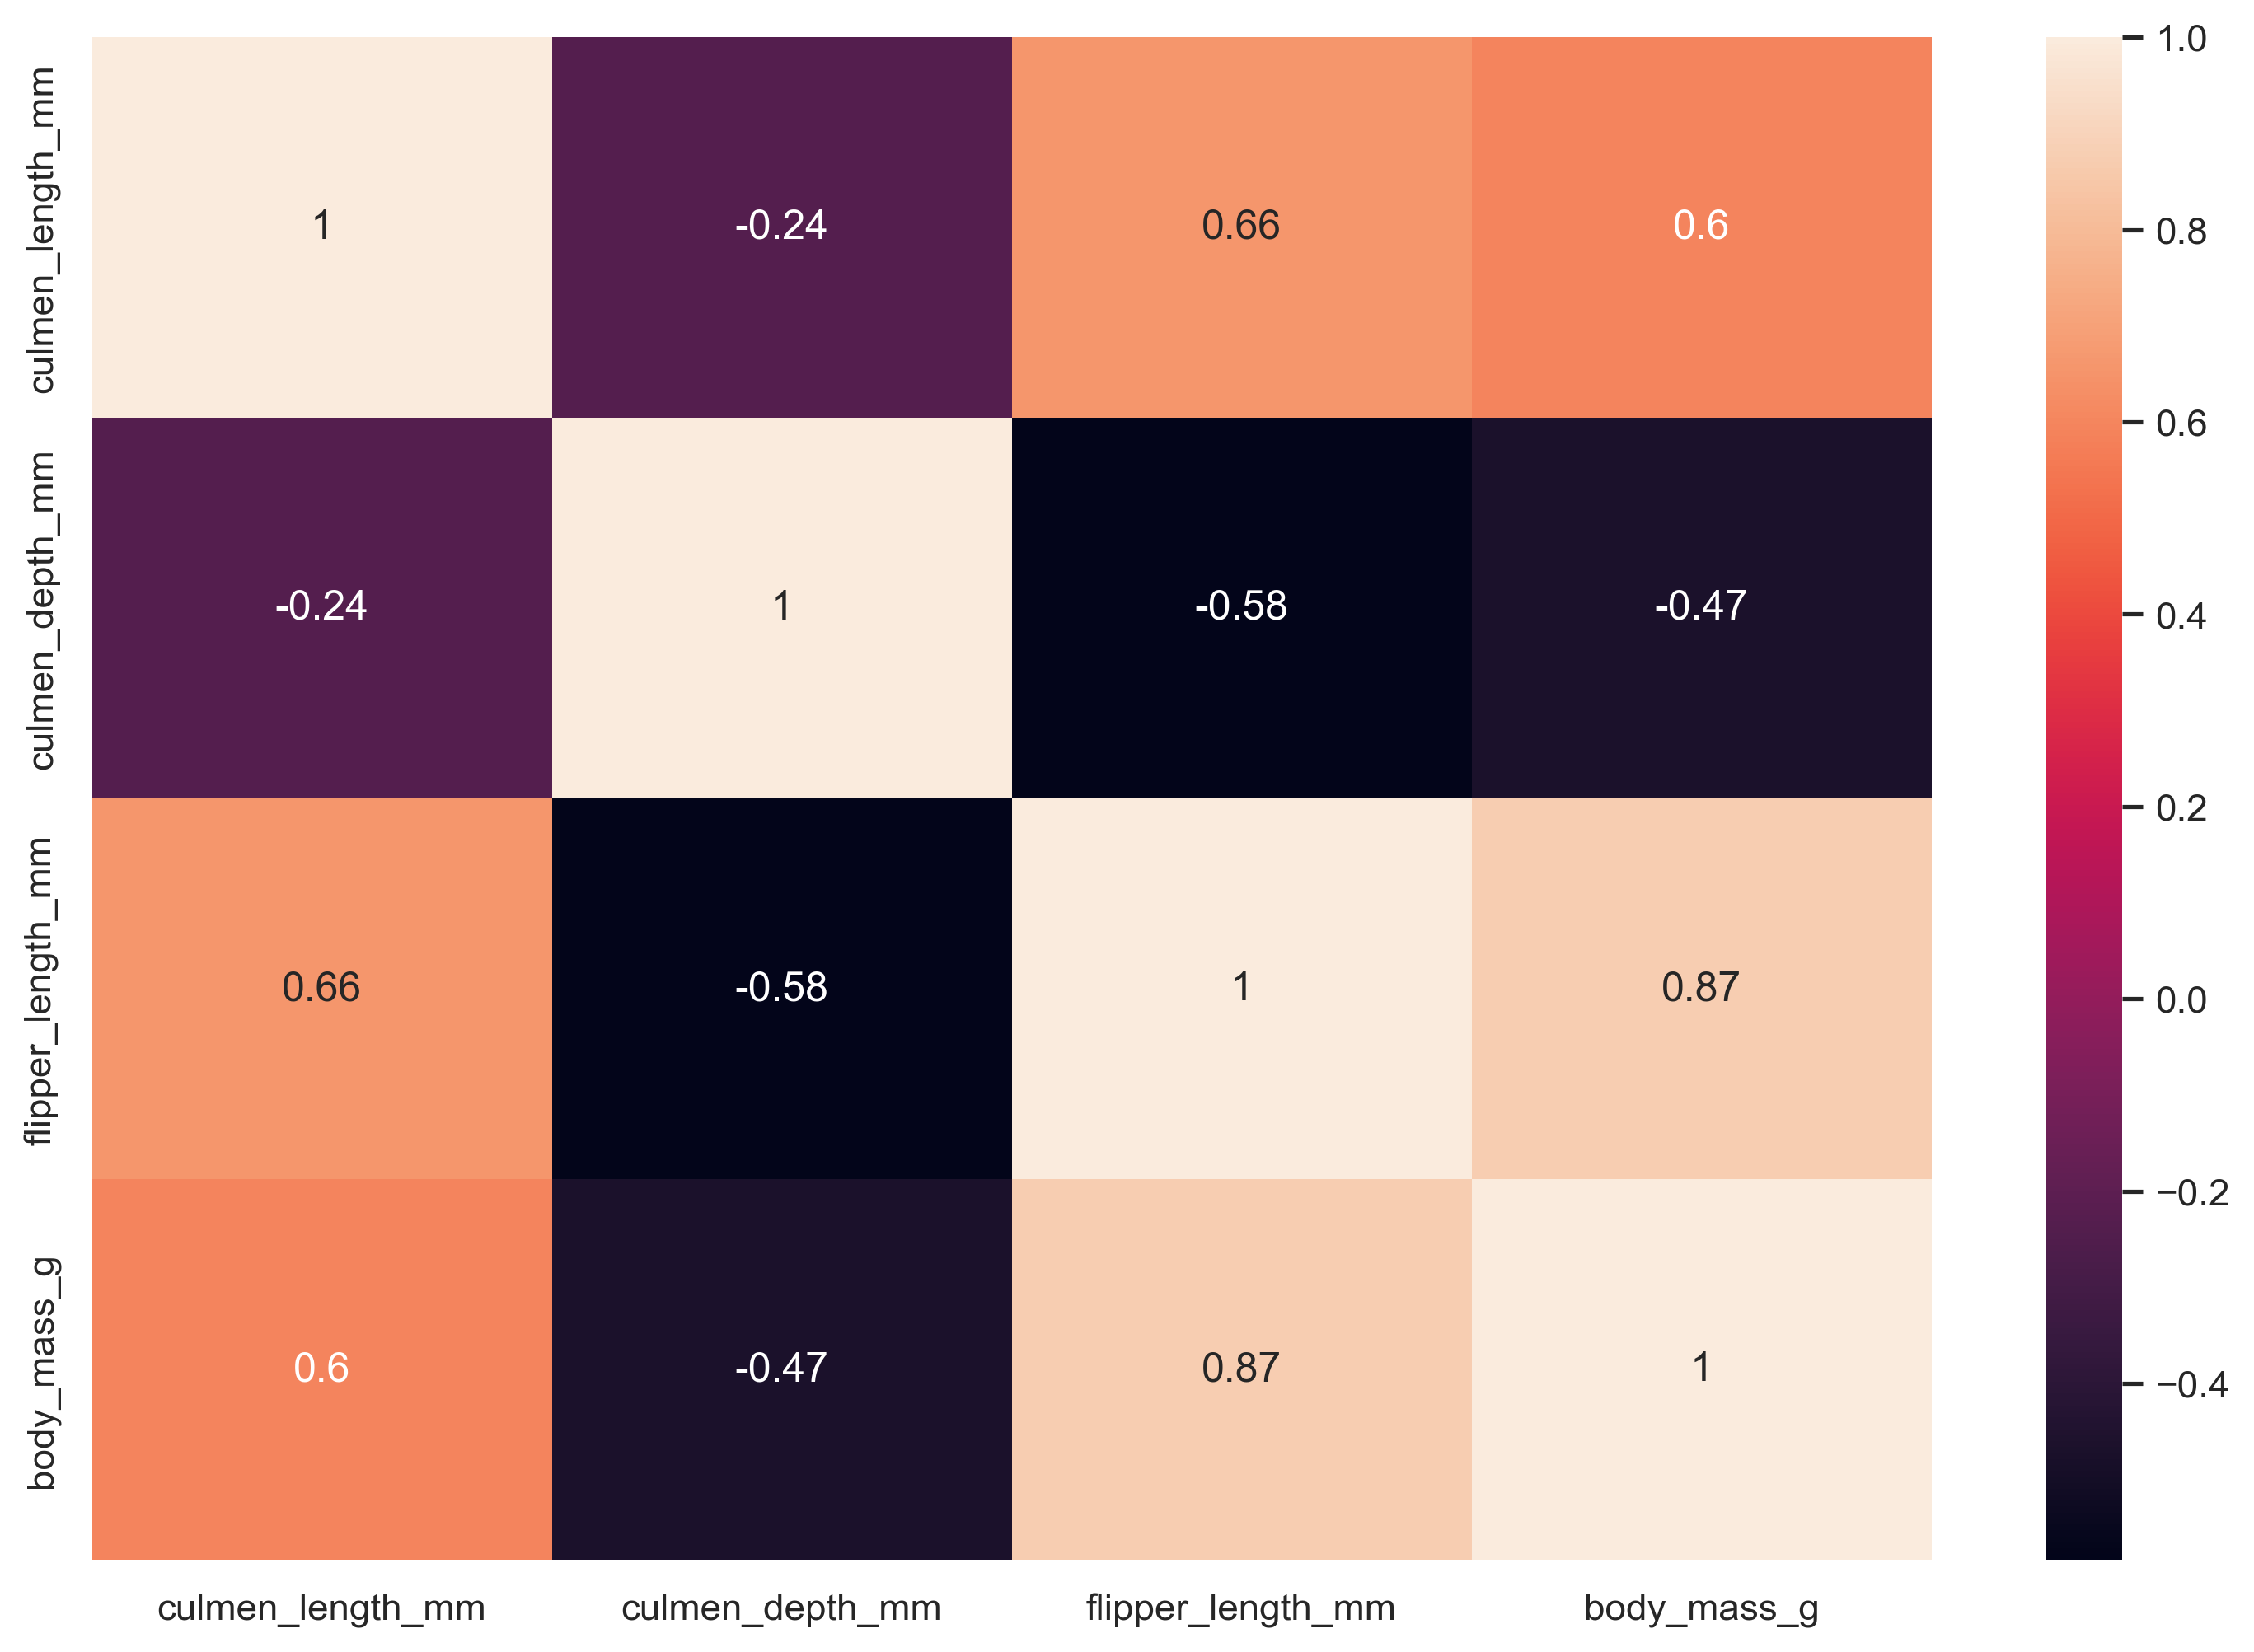

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df.head()
df = df.dropna(axis=0).reset_index(drop = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.4+ KB


In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
X = X.iloc[:, :-1]

In [ ]:
X_ohe = pd.get_dummies(X.island, prefix = "Island")
X = pd.concat([X_ohe, X], axis = 1, join = 'inner')
X.tail()

,Island_Biscoe,Island_Dream,Island_Torgersen,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
329,1,0,0,Biscoe,47.2,13.7,214.0,4925.0
330,1,0,0,Biscoe,46.8,14.3,215.0,4850.0
331,1,0,0,Biscoe,50.4,15.7,222.0,5750.0
332,1,0,0,Biscoe,45.2,14.8,212.0,5200.0
333,1,0,0,Biscoe,49.9,16.1,213.0,5400.0


In [ ]:
X = X.drop("island", axis = 1)

In [ ]:
X.head()

,Island_Biscoe,Island_Dream,Island_Torgersen,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,0,1,39.1,18.7,181.0,3750.0
1,0,0,1,39.5,17.4,186.0,3800.0
2,0,0,1,40.3,18.0,195.0,3250.0
3,0,0,1,36.7,19.3,193.0,3450.0
4,0,0,1,39.3,20.6,190.0,3650.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Island_Biscoe      334 non-null    uint8  
 1   Island_Dream       334 non-null    uint8  
 2   Island_Torgersen   334 non-null    uint8  
 3   culmen_length_mm   334 non-null    float64
 4   culmen_depth_mm    334 non-null    float64
 5   flipper_length_mm  334 non-null    float64
 6   body_mass_g        334 non-null    float64
dtypes: float64(4), uint8(3)
memory usage: 11.5 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", clf_score)

Accuracy: 0.9801980198019802


In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
gnb_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", gnb_score)

Accuracy: 0.8415841584158416


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", knn_score)

Accuracy: 0.7722772277227723


In [ ]:
scores = {
    'Decision Tree':clf_score*100,
    'GaussianNB':gnb_score*100,
    'KNeighborsClassifier':knn_score*100
}
classifiers = list(scores.keys())
values = list(scores.values())


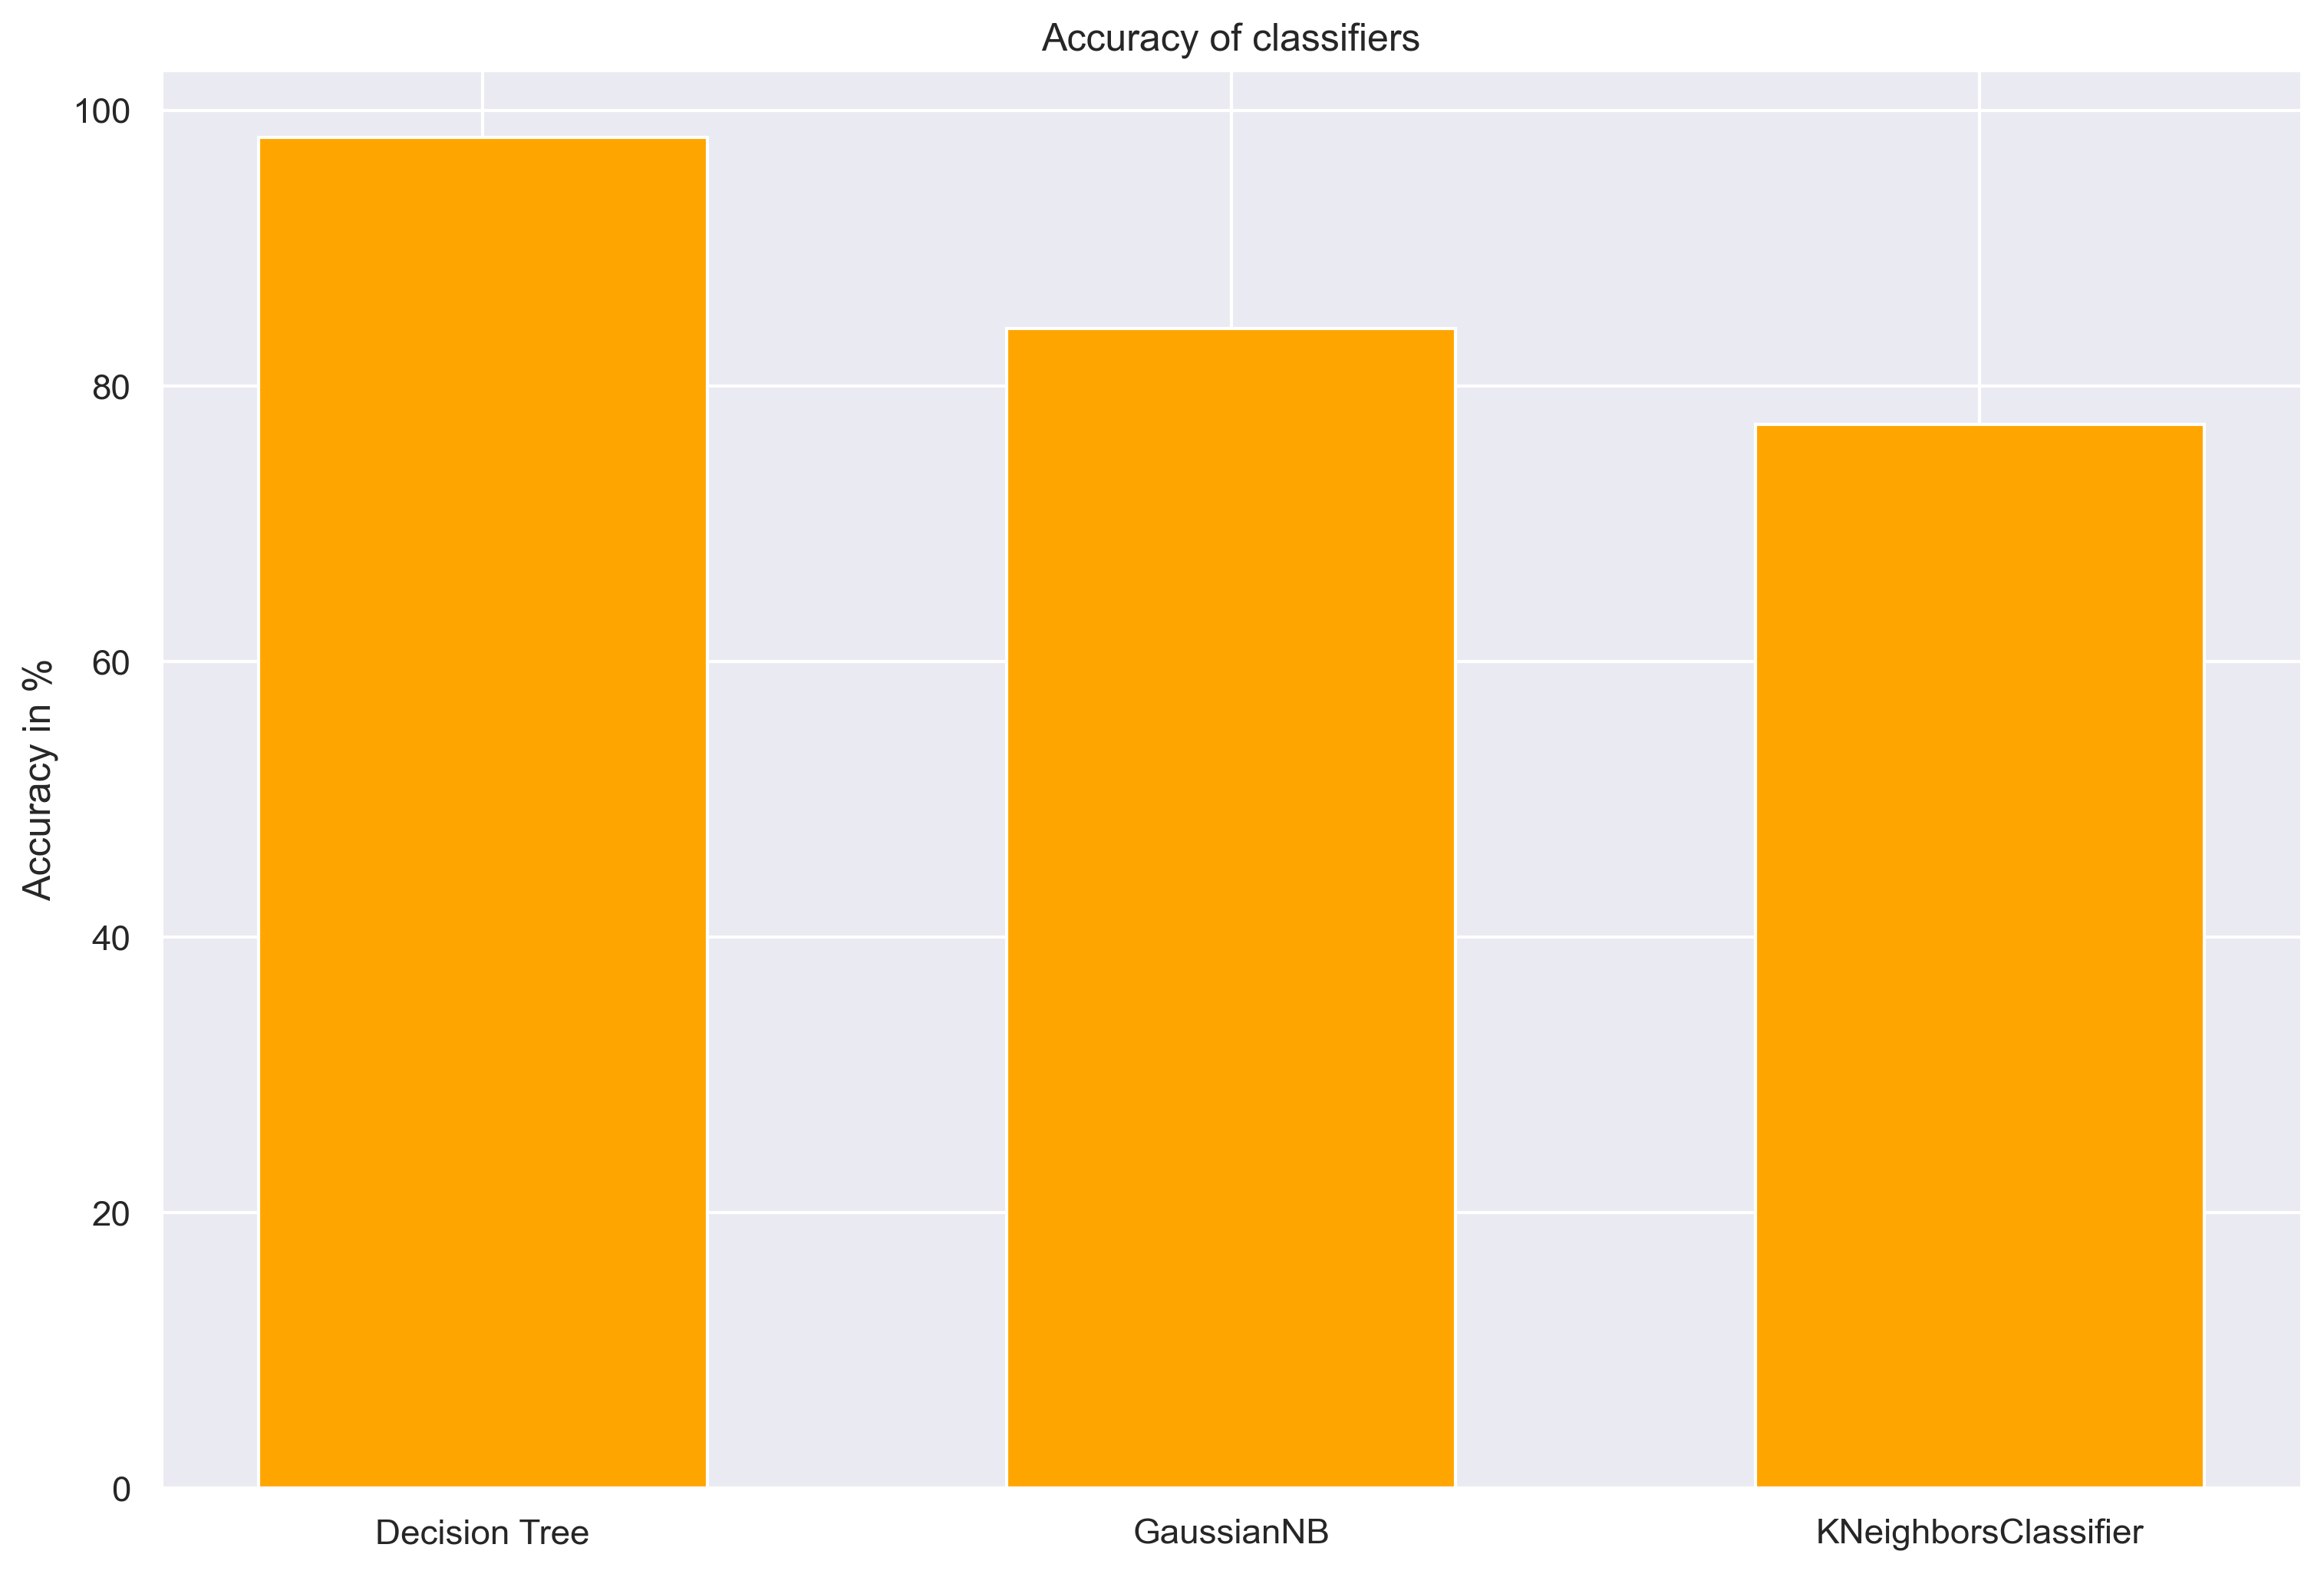

In [ ]:
plt.bar(classifiers, values, color = 'orange', width = 0.6)
plt.title("Accuracy of classifiers")
plt.ylabel("Accuracy in %")
plt.show()